In [333]:
import numpy as np
import csv
path = "Simudyne_Backend_Test.csv"

In [334]:
import matplotlib.pyplot as plt
class Simudyne:
    def __init__(self):
        self.neverProcessed = True
        self.dic = {}
        
        #the dictionary will be used to keep records of changes it has a key,value as policy_Id,change
        #the value 1 means Switched to Breed_NC
        #the value 2 Switch from Breed_NC
        self.Lost = []
        self.Gained = []
        self.ReGained = []
        #self.
    def getData(self, path):
        f = open(path, "r")
        l = list(csv.reader(f))
        if (self.neverProcessed):
            p = np.array(l[0])
            self.labels = np.array([p[i].replace(u'\ufeff', '') for i in range(p.shape[0])])
           # print(self.labels)
        return np.array(l[1:])
    def constructDic(self, data):
        N = data.shape[0]
        for i in range(N):
            self.dic[data[i,1]] = []
    def process(self, path, years):
        brandFac = np.linspace(0.1, 2.9, num=years)
        l = []
        if(self.neverProcessed):
            l = self.getData(path)
            self.neverProcessed = False
            self.constructDic(l)
        else:
            l = self.getData("currentState.csv")
            print(l[0])
        lost = 0
        gained = 0
        regained = 0
        for p in range(years):
           
            for i in range(l.shape[0]):
                if (l[i,8] == '0'):
                   # print("hemmp")
                    rand = np.random.rand() * 3
                    aff = (( float(l[i,4]) / float(l[i,6])) + (rand * float(l[i,7])* float(l[i,9])))
                    if ((l[i,0] == 'Breed_C') and  (aff < (float(l[i, 3]) * float(l[i, 5])))):
                        l[i,0] = 'Breed_NC'   
                       # print("hello")
                        self.dic[l[i,1]].append(1)
                        lost += 1
                    elif((l[i,0] == 'Breed_NC') and (float(l[i,3]) * float(l[i,5]) * brandFac[p])):
                        l[i,0] = 'Breed_C'
                        ltmp =np.array(self.dic[l[i,1]]) 
                       # print(ltmp)
                        if ((ltmp != []) and (len(ltmp[ltmp == 1]) >= 1)):
                            regained += 1
                        else :
                            gained += 1
                        self.dic[l[i,1]].append(2)
            self.Lost.append(lost)
            self.Gained.append(gained)
            self.ReGained.append(regained)
            gaigned = 0
            regaigned = 0
            lost = 0
        for i in range(len(l[:,2])):
            l[i,2] = int(l[i,2]) + int(years) 
        f = open("currentState.csv","w")
        
        for j in range(len(self.labels) - 1):
            f.write(str(self.labels[j]) + ",")
        #f.write("\n")
        f.write(str(self.labels[len(self.labels) - 1]) + "\n")
                    
        for i in range(l.shape[0]):
            for j in range(l.shape[1] - 1):
                f.write(str(l[i,j]) + ",")
            f.write(str(str(l[i,l.shape[1] - 1]) + "\n"))
        
    def autolabels(self, rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % float(height) ,
                  ha='center', va='bottom')
      
    def plot(self, listY = []):
        if (listY == []):
            listY = ind = np.arange(len(self.Gained) - 1) + 1 
        lost = np.array(self.Lost)[listY]
        gained = np.array(self.Gained)[listY]
        regained = np.array(self.ReGained)[listY]
        width = 0.25    
        ind = np.arange(len(listY))
        fig, ax = plt.subplots()
        rects1 = ax.bar(ind , gained, width, color='g')
        rects2 = ax.bar(ind - width, lost, width, color='r')
        rects3 = ax.bar(ind + width, regained, width, color='b')
        lim =  max(lost.max(), gained.max(), regained.max())
        ax.set_ylim(0,1.1 * lim)
        ax.set_ylabel('number of G/L/RG')
        ax.set_title("Histogram of stat")
        ax.set_xticks(ind)
        ax.set_xticks(ind)
        ax.legend((rects1[0], rects2[0], rects3[0]), ('Gaigned', 'Lost', 'Regained'))
        self.autolabels(rects1, ax)
        self.autolabels(rects2, ax)
        self.autolabels(rects3, ax)
        labels = ["year " + str(listY[i]) for i in range(len(listY))]
        ax.set_xticklabels(labels, rotation = 'horizontal')
        plt.savefig("stat.png")
        plt.show()    
        
        
        
        

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


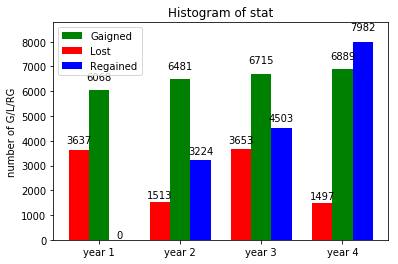

['Breed_NC' '132802001.0' '71' '3' '250' '25.3' '16.6' '5.1' '0' '4']


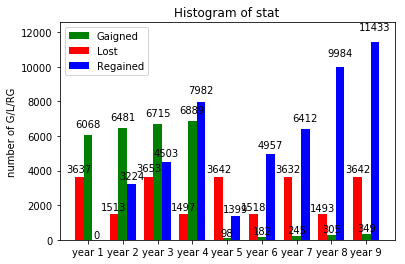

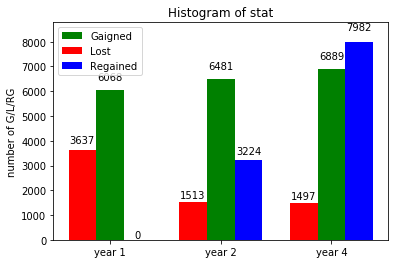

In [335]:
# initialization of the model
sim = Simudyne()
#the model run first time for 5 years
sim.process(path, 5)
#the model gives you output of the first 5 years
sim.plot()
#then the model run for another 5 years
sim.process(path, 5)
#then you want to see the model for the all 10 years
sim.plot()
#what about selecting just the years you desire by passing them as a list
sim.plot([1,2,4])